## Data merging Basics

### Your first inner join
You have been tasked with figuring out what the most popular types of fuel used in Chicago taxis are. To complete the analysis, you need to merge the `taxi_owners` and `taxi_veh` tables together on the `vid` column. You can then use the merged table along with the `.value_counts()` method to find the most common `fuel_type`.
>inner joins only return the rows with matching values in both tables.

In [7]:
# files in the datasets_join folder
import os

os.listdir("datasets_join")

['actors_movies.csv',
 'bac.csv',
 'business_owners.p',
 'casts.p',
 'census.p',
 'classic_18.csv',
 'classic_19.csv',
 'crews.p',
 'cta_calendar.p',
 'cta_ridership.p',
 'employees.csv',
 'financials.p',
 'gdp(3).csv',
 'gdp.csv',
 'genres.csv',
 'inflation.csv',
 'inv_aug.csv',
 'inv_jul.csv',
 'inv_sep.csv',
 'iron_1_actors.csv',
 'iron_2_actors.csv',
 'jpm.csv',
 'land_use.p',
 'licenses.p',
 'movies.p',
 'movie_to_genres.p',
 'non_mus_tcks.csv',
 'pop.csv',
 'pop_18.csv',
 'pop_19.csv',
 'ratings.p',
 'recession.csv',
 'S&P500.csv',
 'sequels.p',
 'stations.p',
 'taglines.p',
 'taxi_owners.p',
 'taxi_vehicles.p',
 'top_cust.csv',
 'top_invoices.csv',
 'tracks_master.csv',
 'tracks_ride.csv',
 'tracks_st.csv',
 'unemployment.csv',
 'ward (1).p',
 'wells.csv',
 'WorldBank_GDP.csv',
 'WorldBank_POP.csv',
 'zip_demo.p']

In [8]:
import pandas as pd
taxi_owners = pd.read_pickle('datasets_join/taxi_owners.p')
taxi_owners.head()

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


In [9]:
taxi_veh = pd.read_pickle('datasets_join/taxi_vehicles.p')
taxi_veh.head()

,vid,make,model,year,fuel_type,owner
0,2767,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI
1,1411,TOYOTA,RAV4,2017,HYBRID,DESZY CORP.
2,6500,NISSAN,SENTRA,2019,GASOLINE,AGAPH CAB CORP
3,2746,TOYOTA,CAMRY,2013,HYBRID,"MIDWEST CAB CO, INC"
4,5922,TOYOTA,CAMRY,2013,HYBRID,SUMETTI CAB CO


In [10]:
# Merge the taxi_owners and taxi_veh tables
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid')

# Print the column names of the taxi_own_veh
taxi_own_veh.columns

Index(['rid', 'vid', 'owner_x', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_y'],
      dtype='object')

In [11]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes = ('_own', '_veh'))

# Print the column names of taxi_own_veh
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_veh'],
      dtype='object')


In [12]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own','_veh'))

# Print the value_counts to find the most popular fuel_type
taxi_own_veh['fuel_type'].value_counts()

fuel_type
HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: count, dtype: int64

>The most common fuel type for taxis in Chicago are hybrids.

### Inner joins and number of rows returned
All of the merges you have studied to this point are called inner joins. It is necessary to understand that inner joins only return the rows with matching values in both tables. You will explore this further by reviewing the merge between the `wards` and `census` tables, then comparing it to merges of copies of these tables that are slightly altered, named `wards_altered`, and `census_altered`. The first row of the wards column has been changed in the altered tables. You will examine how this affects the merge between them. The tables have been loaded for you.

For this exercise, it is important to know that the `wards` and `census` tables start with 50 rows.

In [15]:
wards = pd.read_pickle('datasets_join/ward (1).p')
wards.head()

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [16]:
census = pd.read_pickle('datasets_join/census.p')
census.head()

,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [17]:
# Merge the wards and census tables on the ward column
wards_census = wards.merge(census, on='ward')

# Print the shape of wards_census
print('wards_census table shape:', wards_census.shape)

wards_census table shape: (50, 9)


### One-to-many relationship merge
A business may have one or multiple owners. In this exercise, you will continue to gain experience with one-to-many merges by merging a table of business owners, called `biz_owners`, to the `licenses` table. Recall from the video lesson, with a one-to-many relationship, a row in the left table may be repeated if it is related to multiple rows in the right table. In this lesson, you will explore this further by finding out what is the most common business owner title. (i.e., secretary, CEO, or vice president).

In [19]:
biz_owners = pd.read_pickle('datasets_join/business_owners.p')
biz_owners.head()

,account,first_name,last_name,title
0,10,PEARL,SHERMAN,PRESIDENT
1,10,PEARL,SHERMAN,SECRETARY
2,10002,WALTER,MROZEK,PARTNER
3,10002,CELINA,BYRDAK,PARTNER
4,10005,IRENE,ROSENFELD,PRESIDENT


In [20]:
licenses = pd.read_pickle('datasets_join/licenses.p')
licenses.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [21]:
# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners, on='account')

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby('title').agg({'account':'count'})

# Sort the counted_df in descending order
sorted_df = counted_df.sort_values('account', ascending=False)

# Use .head() method to print the first few rows of sorted_df
sorted_df.head().style.highlight_max(color='green').highlight_min(color='red')

,account
title,
PRESIDENT,6259
SECRETARY,5205
SOLE PROPRIETOR,1658
OTHER,1200
VICE PRESIDENT,970


>You see that president, followed by secretary, are the most common business owner titles.

### Merging Multiple DataFrame

#### Total riders in a month

**Your goal:** Find the total number of rides provided to passengers passing through the Wilson station ( `station_name == 'Wilson'` ) when riding Chicago's public transportation system on weekdays ( `day_type == 'Weekday'` ) in July ( `month == 7` ).

Luckily, Chicago provides this detailed data, but it is in three different tables. You will work on merging these tables together to answer the question. This data is different from the business-related data you have seen so far, but all the information you need to answer the question is provided.

The `cal`, `ridership`, and `stations` DataFrames have been loaded.

In [25]:
cal = pd.read_pickle('datasets_join/cta_calendar.p')
cal.head()

,year,month,day,day_type
0,2019,1,1,Sunday/Holiday
1,2019,1,2,Weekday
2,2019,1,3,Weekday
3,2019,1,4,Weekday
4,2019,1,5,Saturday


In [26]:
ridership = pd.read_pickle('datasets_join/cta_ridership.p')
ridership.head()

,station_id,year,month,day,rides
0,40010,2019,1,1,576
1,40010,2019,1,2,1457
2,40010,2019,1,3,1543
3,40010,2019,1,4,1621
4,40010,2019,1,5,719


In [27]:
stations = pd.read_pickle('datasets_join/stations.p')
stations.head()

,station_id,station_name,location
0,40010,Austin-Forest Park,"(41.870851, -87.776812)"
1,40020,Harlem-Lake,"(41.886848, -87.803176)"
2,40030,Pulaski-Lake,"(41.885412, -87.725404)"
3,40040,Quincy/Wells,"(41.878723, -87.63374)"
4,40050,Davis,"(42.04771, -87.683543)"


In [28]:
# Merge the ridership and cal tables
ridership_cal = ridership.merge(cal)
ridership_cal.columns

Index(['station_id', 'year', 'month', 'day', 'rides', 'day_type'], dtype='object')

In [29]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
            				.merge(stations)
ridership_cal_stations.columns

Index(['station_id', 'year', 'month', 'day', 'rides', 'day_type',
       'station_name', 'location'],
      dtype='object')

In [30]:
# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

ridership_cal_stations[filter_criteria].head()

,station_id,year,month,day,rides,day_type,station_name,location
1641,40540,2019,7,1,6464,Weekday,Wilson,"(41.964273, -87.657588)"
1642,40540,2019,7,2,6491,Weekday,Wilson,"(41.964273, -87.657588)"
1643,40540,2019,7,3,6639,Weekday,Wilson,"(41.964273, -87.657588)"
1645,40540,2019,7,5,4794,Weekday,Wilson,"(41.964273, -87.657588)"
1648,40540,2019,7,8,6351,Weekday,Wilson,"(41.964273, -87.657588)"


In [31]:
# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

140005


>The Wilson station had 140,005 riders during weekdays in July.

#### Three Table Merge

To solidify the concept of a three DataFrame merge, practice another exercise. A reasonable extension of our review of Chicago business data would include looking at demographics information about the neighborhoods where the businesses are. A table with the median income by zip code has been provided to you. You will merge the `licenses` and `wards` tables with this new income-by-zip-code table called `zip_demo`.

The `licenses`, `wards`, and `zip_demo` DataFrames have been loaded.


In [34]:
zip_demo = pd.read_pickle('datasets_join/zip_demo.p')
zip_demo.head()

,zip,income
0,60630,70122
1,60640,50488
2,60622,87143
3,60614,100116
4,60608,41226


In [35]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on='zip') \
            			.merge(wards, on='ward')

# Print the results by alderman and show median income
income = licenses_zip_ward.groupby('alderman').agg({'income':'median'})

sorted_income = income.sort_values('income', ascending=False)

sorted_income.style.highlight_max(color='green').highlight_min(color='red')

,income
alderman,
Brendan Reilly,110215.000000
William D. Burns,107811.000000
Michelle Smith,100116.000000
Tom Tunney,88708.000000
Brian Hopkins,87143.000000
"Proco ""Joe"" Moreno",87143.000000
"Walter Burnett, Jr.",87143.000000
Anthony V. Napolitano,82226.000000
James Cappleman,79565.000000


>You see that only a few aldermen represent businesses in areas where the median income is greater than $62,000, which is the median income for the state of Illinois.

#### One-to-many merge with multiple tables

In this exercise, assume that you are looking to start a business in the city of Chicago. Your perfect idea is to start a company that uses goats to mow the lawn for other businesses. However, you have to choose a location in the city to put your goat farm. You need a location with a great deal of space and relatively few businesses and people around to avoid complaints about the smell. You will need to merge three tables to help you choose your location.

The `land_use` table has info on the percentage of vacant land by city ward. 

The `census` table has population by ward, and the `licenses` table lists businesses by ward.

In [38]:
land_use = pd.read_pickle('datasets_join/land_use.p')
land_use.head()

,ward,residential,commercial,industrial,vacant,other
0,1,41,9,2,2,46
1,2,31,11,6,2,50
2,3,20,5,3,13,59
3,4,22,13,0,7,58
4,5,25,3,1,3,68


In [39]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic =land_use.merge(census, on='ward') \
                      .merge(licenses, on='ward', suffixes=['_cen', '_lic'])
land_cen_lic.head()

,ward,residential,commercial,industrial,vacant,other,pop_2000,pop_2010,change,address_cen,zip_cen,account,aid,business,address_lic,zip_lic
0,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,12024,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622
1,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14446,743,EMPTY BOTTLE INC,1035 N WESTERN AVE 1ST,60622
2,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,60647
3,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14987,NaN,MR. BROWN'S LOUNGE,2301 W CHICAGO AVE 1ST,60622
4,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,15642,814,Beat Kitchen,2000-2100 W DIVISION ST,60622


In [40]:
# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward', 'pop_2010', 'vacant'], 
                                   as_index=False).agg({'account':'count'})
# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant', 'account', 'pop_2010'], 
                                             ascending=[False, True, True])

# Print the top few rows of sorted_pop_vac_lic
sorted_pop_vac_lic.head()

,ward,pop_2010,vacant,account
47,7,51581,19,80
12,20,52372,15,123
1,10,51535,14,130
16,24,54909,13,98
7,16,51954,13,156


>The 7th ward would be a good place to build your goat farm!

## Merging Tables With Different Join Types

### left join

#### Enriching a dataset
Setting `how='left'` with the `.merge()` method is a useful technique for enriching or enhancing a dataset with additional information from a different table. In this exercise, you will start off with a sample of movie data from the movie series Toy Story. Your goal is to enrich this data by adding the marketing tag line for each movie. You will compare the results of a left join versus an inner join.

The `toy_story` DataFrame contains the ***Toy Story*** movies. The `toy_story` and `taglines` DataFrames have been loaded for you.

In [44]:
import pandas as pd
import os
# os.listdir('datasets_join/')

In [45]:
movies = pd.read_pickle('datasets_join/movies.p')
movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [46]:
toy_title_ls = ['Toy Story 3', 'Toy Story 2', 'Toy Story']

toy_title_sub = movies['title'].isin(toy_title_ls)

toy_story = movies[toy_title_sub]

toy_story

,id,title,popularity,release_date
103,10193,Toy Story 3,59.995418,2010-06-16
2637,863,Toy Story 2,73.575118,1999-10-30
3716,862,Toy Story,73.640445,1995-10-30


In [47]:
taglines = pd.read_pickle('datasets_join/taglines.p')
taglines.head()

,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."


In [48]:
# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines, on='id', how='left')

# Print the rows and shape of toystory_tag
toystory_tag

,id,title,popularity,release_date,tagline
0,10193,Toy Story 3,59.995418,2010-06-16,No toy gets left behind.
1,863,Toy Story 2,73.575118,1999-10-30,The toys are back!
2,862,Toy Story,73.640445,1995-10-30,NaN


In [49]:
print(toystory_tag.shape)

(3, 5)


In [50]:
# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, on='id')

# Print the rows and shape of toystory_tag
toystory_tag

,id,title,popularity,release_date,tagline
0,10193,Toy Story 3,59.995418,2010-06-16,No toy gets left behind.
1,863,Toy Story 2,73.575118,1999-10-30,The toys are back!


In [51]:
print(toystory_tag.shape)

(2, 5)


>If your goal is to enhance or enrich a dataset, then you do not want to lose any of your original data. A left join will do that by returning all of the rows of your left table, while using an inner join may result in lost data if it does not exist in both tables.

### Other joins
#### Right join to find unique movies
Most of the recent big-budget science fiction movies can also be classified as action movies. You are given a table of science fiction movies called `scifi_movies` and another table of action movies called `action_movies`. Your goal is to find which movies are considered only science fiction movies. Once you have this table, you can merge the movies table in to see the movie names. Since this exercise is related to science fiction movies, use a right join as your superhero power to solve this problem.

In [54]:
movies_to_genre = pd.read_pickle('datasets_join/movie_to_genres.p')
movies_to_genre.head()

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure


In [55]:
scifi_movies = movies_to_genre[movies_to_genre['genre'] == 'Science Fiction']
scifi_movies.head()

,movie_id,genre
2,11,Science Fiction
17,18,Science Fiction
20,19,Science Fiction
38,38,Science Fiction
49,62,Science Fiction


In [56]:
action_movies = movies_to_genre[movies_to_genre['genre'] == 'Action']
action_movies.head()

,movie_id,genre
3,11,Action
14,18,Action
25,22,Action
26,24,Action
42,58,Action


In [57]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, 
                                   how='right', 
                                   on='movie_id', 
                                   suffixes=['_act', '_sci'])
action_scifi.head()

,movie_id,genre_act,genre_sci
0,11,Action,Science Fiction
1,18,Action,Science Fiction
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction


In [58]:
# From action_scifi, select only the rows where the genre_act column is null
scifI_only = action_scifi[action_scifi['genre_act'].isnull()]

scifI_only.head()

,movie_id,genre_act,genre_sci
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction
5,68,NaN,Science Fiction
6,74,NaN,Science Fiction


In [59]:
movies.columns

Index(['id', 'title', 'popularity', 'release_date'], dtype='object')

In [60]:
# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifI_only, how='inner', left_on='id', right_on='movie_id')

In [61]:
movies_and_scifi_only.head()

,id,title,popularity,release_date,movie_id,genre_act,genre_sci
0,18841,The Lost Skeleton of Cadavra,1.680525,2001-09-12,18841,NaN,Science Fiction
1,26672,The Thief and the Cobbler,2.439184,1993-09-23,26672,NaN,Science Fiction
2,15301,Twilight Zone: The Movie,12.902975,1983-06-24,15301,NaN,Science Fiction
3,8452,The 6th Day,18.447479,2000-11-17,8452,NaN,Science Fiction
4,1649,Bill & Ted's Bogus Journey,11.349664,1991-07-19,1649,NaN,Science Fiction


In [62]:
movies_and_scifi_only.shape

(258, 7)

#### Popular genres with right join

What are the genres of the most popular movies? To answer this question, you need to merge data from the `movies` and `movie_to_genres` tables. In a table called `pop_movies`, the top 10 most popular movies in the `movies` table have been selected. To ensure that you are analyzing all of the popular movies, merge it with the `movie_to_genres` table using a right join. To complete your analysis, count the number of different genres. Also, the two tables can be merged by the movie ID. However, in `pop_movies` that column is called `id`, and in `movie_to_genres` it's called `movie_id`.


In [64]:
pop_movies = movies.sort_values('popularity', ascending=False).head(10)
pop_movies

,id,title,popularity,release_date
4546,211672,Minions,875.581305,2015-06-17
4343,157336,Interstellar,724.247784,2014-11-05
1966,293660,Deadpool,514.569956,2016-02-09
2423,118340,Guardians of the Galaxy,481.098624,2014-07-30
4220,76341,Mad Max: Fury Road,434.278564,2015-05-13
1867,135397,Jurassic World,418.708552,2015-06-09
4375,22,Pirates of the Caribbean: The Curse of the Bla...,271.972889,2003-07-09
1106,119450,Dawn of the Planet of the Apes,243.791743,2014-06-26
4216,131631,The Hunger Games: Mockingjay - Part 1,206.227151,2014-11-18
2614,177572,Big Hero 6,203.734590,2014-10-24


In [65]:
movies_to_genre.columns

Index(['movie_id', 'genre'], dtype='object')

In [66]:
genre_movies = movies_to_genre.merge(pop_movies, 
                                     how='right', 
                                     left_on='movie_id', 
                                     right_on='id')

genre_movies.head()

,movie_id,genre,id,title,popularity,release_date
0,211672,Comedy,211672,Minions,875.581305,2015-06-17
1,211672,Adventure,211672,Minions,875.581305,2015-06-17
2,211672,Animation,211672,Minions,875.581305,2015-06-17
3,211672,Family,211672,Minions,875.581305,2015-06-17
4,157336,Drama,157336,Interstellar,724.247784,2014-11-05


In [67]:
genre_count = genre_movies.groupby('genre').agg({'id':'count'})
genre_count = genre_count.sort_values('id')
genre_count

,id
genre,
Fantasy,1
Animation,2
Drama,2
Family,2
Comedy,3
Thriller,4
Science Fiction,6
Action,7
Adventure,9


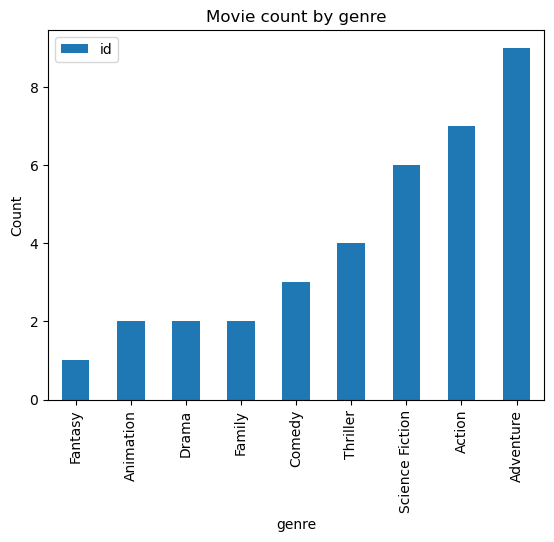

In [68]:
import matplotlib.pyplot as plt
# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.title('Movie count by genre')
plt.ylabel('Count')
plt.show()

> You see from the results that adventure and action are the most popular genres.

#### Using Outer Join to Select Actors

One cool aspect of using an outer join is that, because it returns all rows from both merged tables and null where they do not match, you can use it to find rows that do not have a match in the other table. To try for yourself, you have been given two tables with a list of actors from two popular movies: Iron Man 1 and Iron Man 2. Most of the actors played in both movies. Use an outer join to find actors who did not act in both movies.

The `Iron Man 1` table is called `iron_1_actors`, and `Iron Man 2` table is called `iron_2_actors`. Both tables have been loaded for you and a few rows printed so you can see the structure.


In [71]:
import os
# os.listdir('datasets_join/')

In [72]:
import pandas as pd
actors_movies = pd.read_csv('datasets_join/actors_movies.csv')
actors_movies.head()

,Actor,Title
0,"[Emil Eifrem,Hugo Weaving,Laurence Fishburne,C...",The Matrix
1,"[Hugo Weaving,Laurence Fishburne,Carrie-Anne M...",The Matrix Reloaded
2,"[Hugo Weaving,Laurence Fishburne,Carrie-Anne M...",The Matrix Revolutions
3,"[Al Pacino,Charlize Theron,Keanu Reeves]",The Devil's Advocate
4,"[James Marshall,Kevin Pollak,J.T. Walsh,Aaron ...",A Few Good Men


In [73]:
casts = pd.read_pickle('datasets_join/casts.p')
casts.head()

,movie_id,cast_id,character,gender,id,name
7,5,22,Jezebel,1,3122,Sammi Davis
8,5,23,Diana,1,3123,Amanda de Cadenet
9,5,24,Athena,1,3124,Valeria Golino
3,5,25,Elspeth,1,3125,Madonna
12,5,26,Eva,1,3126,Ione Skye


In [74]:
movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [75]:
ironman_1 = movies['title'].isin(['Iron Man'])
movies[ironman_1]

,id,title,popularity,release_date
2198,1726,Iron Man,120.725053,2008-04-30


In [76]:
ironman_2 = movies['title'].isin(['Iron Man 2'])
movies[ironman_2]

,id,title,popularity,release_date
3401,10138,Iron Man 2,77.300194,2010-04-28


In [77]:
# Iron man 3 casts
iron_1_actors = casts[casts['movie_id']==1726][['character', 'id', 'name']]
iron_1_actors.head()

,character,id,name
3,Yinsen,17857,Shaun Toub
4,"Virginia ""Pepper"" Potts",12052,Gwyneth Paltrow
2,Obadiah Stane / Iron Monger,1229,Jeff Bridges
1,"Lt. Col. James ""Rhodey"" Rhodes / War Machine",18288,Terrence Howard
7,Christine Everhart,57451,Leslie Bibb


In [78]:
# Iron man 2 casts
iron_2_actors = casts[casts['movie_id']==10138][['character', 'id', 'name']]
iron_2_actors.head()

,character,id,name
4,Ivan Vanko / Whiplash,2295,Mickey Rourke
3,Natalie Rushman / Natasha Romanoff / Black Widow,1245,Scarlett Johansson
5,Justin Hammer,6807,Sam Rockwell
6,Director Nick Fury,2231,Samuel L. Jackson
1,"Virginia ""Pepper"" Potts",12052,Gwyneth Paltrow


In [79]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
                                     on='id',
                                     how='outer',
                                     suffixes=['_1','_2'])

# Create an index that returns true if name_1 or name_2 are null
index_null = iron_1_and_2['name_1'].isnull() | iron_1_and_2['name_2'].isnull()

# Print the first few rows of iron_1_and_2
iron_1_and_2[index_null].head()

,character_1,id,name_1,character_2,name_2
0,Obadiah Stane / Iron Monger,1229,Jeff Bridges,NaN,NaN
1,NaN,1245,NaN,Natalie Rushman / Natasha Romanoff / Black Widow,Scarlett Johansson
2,NaN,1896,NaN,"Lt. Col. James ""Rhodey"" Rhodes / War Machine",Don Cheadle
4,NaN,2295,NaN,Ivan Vanko / Whiplash,Mickey Rourke
7,NaN,6807,NaN,Justin Hammer,Sam Rockwell


> Using an outer join, you were able to pick only those rows where the actor played in only one of the two movies.

### Self Join

Merging a table to itself can be useful when you want to compare values in a column to other values in the same column. In this exercise, you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row.

You have been given a table called `crews`, which has columns `id`, `job`, and `name`.

First, merge the table to itself using the movie ID. This merge will give you a larger table where for each movie, every job is matched against each other.

Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.

In [82]:
crews = pd.read_pickle('datasets_join/crews.p')
crews.head()

,id,department,job,name
0,19995,Editing,Editor,Stephen E. Rivkin
2,19995,Sound,Sound Designer,Christopher Boyes
4,19995,Production,Casting,Mali Finn
6,19995,Directing,Director,James Cameron
7,19995,Writing,Writer,James Cameron


In [83]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner', suffixes=['_dir', '_crew'])

In [84]:
crews_self_merged.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
0,19995,Editing,Editor,Stephen E. Rivkin,Editing,Editor,Stephen E. Rivkin
1,19995,Editing,Editor,Stephen E. Rivkin,Sound,Sound Designer,Christopher Boyes
2,19995,Editing,Editor,Stephen E. Rivkin,Production,Casting,Mali Finn
3,19995,Editing,Editor,Stephen E. Rivkin,Directing,Director,James Cameron
4,19995,Editing,Editor,Stephen E. Rivkin,Writing,Writer,James Cameron


In [85]:
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & (crews_self_merged['job_crew'] != 'Director'))

In [86]:
direct_crews = crews_self_merged[boolean_filter]

In [87]:
direct_crews.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
156,19995,Directing,Director,James Cameron,Editing,Editor,Stephen E. Rivkin
157,19995,Directing,Director,James Cameron,Sound,Sound Designer,Christopher Boyes
158,19995,Directing,Director,James Cameron,Production,Casting,Mali Finn
160,19995,Directing,Director,James Cameron,Writing,Writer,James Cameron
161,19995,Directing,Director,James Cameron,Art,Set Designer,Richard F. Mays


>By merging the table to itself, you compared the value of the __director__ from the jobs column to other values from the jobs column. With the output, you can quickly see different movie directors and the people they worked with in the same movie.

### Index merge for movie ratings
To practice merging on indexes, you will merge `movies` and a table called `ratings` that holds info about movie ratings. Ensure that your merge returns all rows from the `movies` table, and only matching rows from the `ratings` table.

In [90]:
ratings = pd.read_pickle('datasets_join/ratings.p')
ratings.head()

,id,vote_average,vote_count
0,19995,7.2,11800.0
1,285,6.9,4500.0
2,206647,6.3,4466.0
3,49026,7.6,9106.0
4,49529,6.1,2124.0


In [91]:
# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, on='id')

# Print the first few rows of movies_ratings
movies_ratings.head()

,id,title,popularity,release_date,vote_average,vote_count
0,257,Oliver Twist,20.415572,2005-09-23,6.7,274.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,6.5,27.0
2,38365,Grown Ups,38.864027,2010-06-24,6.0,1705.0
3,9672,Infamous,3.680896,2006-11-16,6.4,60.0
4,12819,Alpha and Omega,12.300789,2010-09-17,5.3,124.0


### Do sequels earn more?

It is time to put together many of the aspects that you have learned in this chapter. In this exercise, you'll find out which movie sequels earned the most compared to the original movie. To answer this question, you will merge a modified version of the `sequels` and `financials` tables where their index is the movie ID. You will need to choose a merge type that will return all of the rows from the `sequels` table and not all the rows of `financials` table need to be included in the result. From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel. Next, you will calculate the difference between the two revenues and sort the resulting dataset.

In [93]:
sequels = pd.read_pickle('datasets_join/sequels.p')
sequels.head()

,id,title,sequel
0,19995,Avatar,<NA>
1,862,Toy Story,863
2,863,Toy Story 2,10193
3,597,Titanic,<NA>
4,24428,The Avengers,<NA>


In [94]:
financials = pd.read_pickle('datasets_join/financials.p')
financials.head()

,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08


In [95]:
sequels_fin = sequels.merge(financials,
                            on='id',
                            how='left')

sequels_fin.head()

,id,title,sequel,budget,revenue
0,19995,Avatar,<NA>,237000000.0,2.787965e+09
1,862,Toy Story,863,30000000.0,3.735540e+08
2,863,Toy Story 2,10193,90000000.0,4.973669e+08
3,597,Titanic,<NA>,200000000.0,1.845034e+09
4,24428,The Avengers,<NA>,220000000.0,1.519558e+09


In [96]:
# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                             right_on='id', right_index=True,
                             suffixes=['_org', '_seq'])

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

In [97]:
# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org', 'title_seq', 'diff']]

In [98]:
# Print the first rows of the sorted titles_diff
titles_diff.sort_values('diff', ascending=False).head()

,title_org,title_seq,diff
2929,Before Sunrise,The Amazing Spider-Man 2,700182027.0
1256,Star Trek III: The Search for Spock,The Matrix,376517383.0
293,Indiana Jones and the Temple of Doom,Man of Steel,329845518.0
1084,Saw,Superman Returns,287169523.0
1334,The Terminator,Star Trek Beyond,265100616.0


>Jurassic World had one of the highest of all, improvement in revenue compared to the original movie.

## Advanced Merging and Concatenating

### Performing an anti join
In our music streaming company dataset, each customer is assigned an employee representative to assist them. In this exercise, filter the employee table by a table of top customers, returning only those employees who are not assigned to a customer. The results should resemble the results of an anti join. The company's leadership will assign these employees additional training so that they can work with high valued customers.

The `top_cust` and `employees` tables are available.

In [102]:
import pandas as pd

In [103]:
employees = pd.read_csv('datasets_join/employees.csv')
employees

,srid,lname,fname,title,hire_date,email
0,1,Adams,Andrew,General Manager,2002-08-14,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,2002-05-01,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2003-05-03,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2003-10-17,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,2003-10-17,michael@chinookcorp.com
6,7,King,Robert,IT Staff,2004-01-02,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,2004-03-04,laura@chinookcorp.com


In [104]:
top_cust = pd.read_csv('datasets_join/top_cust.csv')
top_cust.head()

,cid,srid,fname,lname,phone,fax,email
0,1,3,Luís,Gonçalves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br
1,2,5,Leonie,Köhler,+49 0711 2842222,NaN,leonekohler@surfeu.de
2,3,3,François,Tremblay,+1 (514) 721-4711,NaN,ftremblay@gmail.com
3,4,4,Bjørn,Hansen,+47 22 44 22 22,NaN,bjorn.hansen@yahoo.no
4,5,4,František,Wichterlová,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com


In [105]:
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, 
                            how='left', 
                            on='srid', 
                            indicator=True)

empl_cust.head()

,srid,lname_x,fname_x,title,hire_date,email_x,cid,fname_y,lname_y,phone,fax,email_y,_merge
0,1,Adams,Andrew,General Manager,2002-08-14,andrew@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2,Edwards,Nancy,Sales Manager,2002-05-01,nancy@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com,1.0,Luís,Gonçalves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,both
3,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com,3.0,François,Tremblay,+1 (514) 721-4711,NaN,ftremblay@gmail.com,both
4,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com,12.0,Roberto,Almeida,+55 (21) 2271-7000,+55 (21) 2271-7070,roberto.almeida@riotur.gov.br,both


In [106]:
# # Select the srid column where _merge is left_only
srid_list = empl_cust[empl_cust['_merge']=='left_only']['srid']
srid_list

0     1
1     2
61    6
62    7
63    8
Name: srid, dtype: int64

In [107]:
# Select the srid column where _merge is left_only
# srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']
# srid_list

In [108]:
none_cust_empl = employees[employees['srid'].isin(srid_list)]
none_cust_empl

,srid,lname,fname,title,hire_date,email
0,1,Adams,Andrew,General Manager,2002-08-14,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,2002-05-01,nancy@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,2003-10-17,michael@chinookcorp.com
6,7,King,Robert,IT Staff,2004-01-02,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,2004-03-04,laura@chinookcorp.com


> There are five employees not supporting top customers. Anti joins are a powerful tool to filter a main table (i.e. `employees`) by another (i.e. `customers`).

### Performing a semi join
Some of the tracks that have generated the most significant amount of revenue are from TV-shows or are other non-musical audio. You have been given a table of invoices that include top revenue-generating items. Additionally, you have a table of non-musical tracks from the streaming service. In this exercise, you'll use a semi join to find the top revenue-generating non-musical tracks.

The tables `non_mus_tcks`, `top_invoices`, and `genres` have been loaded for you.

In [111]:
non_mus_tcks = pd.read_csv('datasets_join/non_mus_tcks.csv')
non_mus_tcks.head()

,tid,name,aid,mtid,gid,u_price
0,2820,Occupation / Precipice,227,3,19,1.99
1,2821,"Exodus, Pt. 1",227,3,19,1.99
2,2822,"Exodus, Pt. 2",227,3,19,1.99
3,2823,Collaborators,227,3,19,1.99
4,2824,Torn,227,3,19,1.99


In [112]:
top_invoices = pd.read_csv('datasets_join/top_invoices.csv')
top_invoices.head()

,ilid,iid,tid,uprice,quantity
0,470,88,2832,1.99,1
1,473,88,2850,1.99,1
2,476,88,2868,1.99,1
3,527,96,3214,1.99,1
4,528,96,3223,1.99,1


In [113]:
genres = pd.read_csv('datasets_join/genres.csv')
genres.head()

,gid,name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll


In [114]:
# Merge the non_mus_tcks and top_invoices tables on tid
tracks_invoices = non_mus_tcks.merge(top_invoices, on='tid')
tracks_invoices

,tid,name,aid,mtid,gid,u_price,ilid,iid,uprice,quantity
0,2850,The Fix,228,3,21,1.99,473,88,1.99,1
1,2850,The Fix,228,3,21,1.99,2192,404,1.99,1
2,2868,Walkabout,230,3,19,1.99,476,88,1.99,1
3,2868,Walkabout,230,3,19,1.99,2194,404,1.99,1
4,3177,Hot Girl,249,3,19,1.99,1668,306,1.99,1
5,3177,Hot Girl,249,3,19,1.99,2240,412,1.99,1
6,3200,Gay Witch Hunt,251,3,19,1.99,1098,201,1.99,1
7,3200,Gay Witch Hunt,251,3,19,1.99,1670,307,1.99,1
8,3214,Phyllis's Wedding,251,3,22,1.99,527,96,1.99,1
9,3214,Phyllis's Wedding,251,3,22,1.99,1678,310,1.99,1


In [115]:
# Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]
top_tracks

,tid,name,aid,mtid,gid,u_price
18,2850,The Fix,228,3,21,1.99
36,2868,Walkabout,230,3,19,1.99
106,3177,Hot Girl,249,3,19,1.99
129,3200,Gay Witch Hunt,251,3,19,1.99
143,3214,Phyllis's Wedding,251,3,22,1.99
152,3223,How to Stop an Exploding Man,228,3,21,1.99
178,3250,Pilot,254,3,19,1.99


In [116]:
# Group the top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid':'count'})
cnt_by_gid

,gid,tid
0,19,4
1,21,2
2,22,1


In [117]:
# Merge the genres table to cnt_by_gid on gid and print
cnt_by_gid.merge(genres, on='gid')

,gid,tid,name
0,19,4,TV Shows
1,21,2,Drama
2,22,1,Comedy


> 'TV-shows'_ is the non-musical genre that has the most top revenue-generating tracks.

### Concatenation Basics

You have been given a few tables of data with musical track info for different albums from the metal band, Metallica. The track info comes from their *Ride The Lightning*, *Master Of Puppets*, and *St. Anger* albums. Try various features of the `.concat()` method by concatenating the tables vertically together in different ways.

The tables `tracks_master`, `tracks_ride`, and `tracks_st` have loaded for you.

In [120]:
import pandas as pd
tracks_master = pd.read_csv('datasets_join/tracks_master.csv')
tracks_master

,tid,name,aid,mtid,gid,composer,u_price
0,1853,Battery,152,1,3,J.Hetfield/L.Ulrich,0.99
1,1854,Master Of Puppets,152,1,3,K.Hammett,0.99
2,1857,Disposable Heroes,152,1,3,J.Hetfield/L.Ulrich,0.99


In [121]:
tracks_ride = pd.read_csv('datasets_join/tracks_ride.csv')
tracks_ride

,tid,name,aid,mtid,gid,u_price
0,1874,Fight Fire With Fire,154,1,3,0.99
1,1875,Ride The Lightning,154,1,3,0.99
2,1876,For Whom The Bell Tolls,154,1,3,0.99
3,1877,Fade To Black,154,1,3,0.99
4,1878,Trapped Under Ice,154,1,3,0.99


In [122]:
tracks_st = pd.read_csv('datasets_join/tracks_st.csv')
tracks_st

,tid,name,aid,mtid,gid,u_price
0,1882,Frantic,155,1,3,0.99
1,1883,St. Anger,155,1,3,0.99
2,1884,Some Kind Of Monster,155,1,3,0.99
3,1885,Dirty Window,155,1,3,0.99
4,1886,Invisible Kid,155,1,3,0.99


In [123]:
# Concatenate the tracks
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st], sort=True)
tracks_from_albums

,aid,composer,gid,mtid,name,tid,u_price
0,152,J.Hetfield/L.Ulrich,3,1,Battery,1853,0.99
1,152,K.Hammett,3,1,Master Of Puppets,1854,0.99
2,152,J.Hetfield/L.Ulrich,3,1,Disposable Heroes,1857,0.99
0,154,NaN,3,1,Fight Fire With Fire,1874,0.99
1,154,NaN,3,1,Ride The Lightning,1875,0.99
2,154,NaN,3,1,For Whom The Bell Tolls,1876,0.99
3,154,NaN,3,1,Fade To Black,1877,0.99
4,154,NaN,3,1,Trapped Under Ice,1878,0.99
0,155,NaN,3,1,Frantic,1882,0.99
1,155,NaN,3,1,St. Anger,1883,0.99


In [124]:
# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st], join='inner', sort=True)
tracks_from_albums

,aid,gid,mtid,name,tid,u_price
0,152,3,1,Battery,1853,0.99
1,152,3,1,Master Of Puppets,1854,0.99
2,152,3,1,Disposable Heroes,1857,0.99
0,154,3,1,Fight Fire With Fire,1874,0.99
1,154,3,1,Ride The Lightning,1875,0.99
2,154,3,1,For Whom The Bell Tolls,1876,0.99
3,154,3,1,Fade To Black,1877,0.99
4,154,3,1,Trapped Under Ice,1878,0.99
0,155,3,1,Frantic,1882,0.99
1,155,3,1,St. Anger,1883,0.99


### Concatenating with keys
The leadership of the music streaming company has come to you and asked you for assistance in analyzing sales for a recent business quarter. They would like to know which month in the quarter saw the highest average invoice total. You have been given three tables with invoice data named `inv_jul`, `inv_aug`, and `inv_sep`. Concatenate these tables into one to create a graph of the average monthly invoice total.

In [126]:
inv_jul = pd.read_csv('datasets_join/inv_jul.csv')
inv_jul.head()

,iid,cid,invoice_date,total,bill_ctry
0,42,51,2009-07-06,1.98,Sweden
1,43,53,2009-07-06,1.98,UK
2,44,55,2009-07-07,3.96,Australia
3,45,59,2009-07-08,5.94,India
4,46,6,2009-07-11,8.91,Czech Republic


In [127]:
inv_aug = pd.read_csv('datasets_join/inv_aug.csv')
inv_aug.head()

,iid,cid,invoice_date,total,bill_ctry
0,49,30,2009-08-06,1.98,Canada
1,50,32,2009-08-06,1.98,Canada
2,51,34,2009-08-07,3.96,Portugal
3,52,38,2009-08-08,5.94,Germany
4,53,44,2009-08-11,8.91,Finland


In [128]:
inv_sep = pd.read_csv('datasets_join/inv_sep.csv')
inv_sep.head()

,iid,cid,invoice_date,total,bill_ctry
0,56,9,2009-09-06,1.98,Denmark
1,57,11,2009-09-06,1.98,Brazil
2,58,13,2009-09-07,3.96,Brazil
3,59,17,2009-09-08,5.94,USA
4,60,23,2009-09-11,8.91,USA


In [129]:
# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep], 
                            keys=['7jul', '8Aug', '9Sep'])
inv_jul_thr_sep.shape

(103, 5)

In [130]:
inv_jul_thr_sep.head()

iid  cid invoice_date  total       bill_ctry
7jul 0   42   51   2009-07-06   1.98          Sweden
     1   43   53   2009-07-06   1.98              UK
     2   44   55   2009-07-07   3.96       Australia
     3   45   59   2009-07-08   5.94           India
     4   46    6   2009-07-11   8.91  Czech Republic

In [131]:
# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({'total':'mean'})
avg_inv_by_month

,total
7jul,5.431429
8Aug,5.660000
9Sep,5.945455


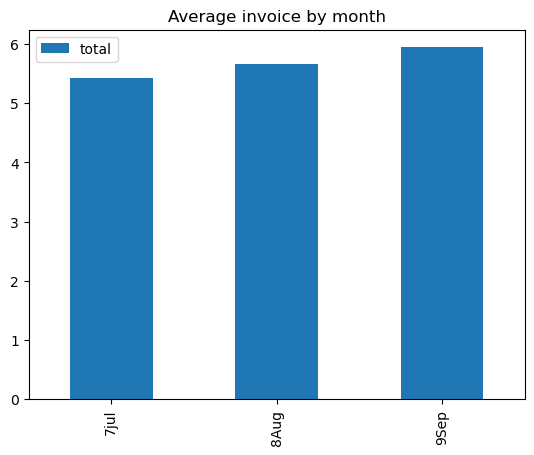

In [132]:
import numpy as np
import matplotlib.pyplot as plt
avg_inv_by_month.plot(kind='bar')
plt.title('Average invoice by month')
plt.show()

> September had the highest average invoice total.

### Concatenate and merge to find common songs
The senior leadership of the streaming service is requesting your help again. You are given the historical files for a popular playlist in the classical music genre in 2018 and 2019. Additionally, you are given a similar set of files for the most popular pop music genre playlist on the streaming service in 2018 and 2019. Your goal is to concatenate the respective files to make a large classical playlist table and overall popular music table. Then filter the classical music table using a semi join to return only the most popular classical music tracks.

The tables `classic_18`, `classic_19`, and `pop_18`, `pop_19` have been loaded for you.

In [135]:
classic_18 = pd.read_csv('datasets_join/classic_18.csv')
classic_18.head()

,pid,tid
0,12,3483
1,12,3416
2,12,3489
3,12,3479
4,12,3440


In [136]:
classic_19 = pd.read_csv('datasets_join/classic_19.csv')
classic_19.head()

,pid,tid
0,12,3482
1,12,3434
2,12,3448
3,12,3499
4,12,3425


In [137]:
pop_18 = pd.read_csv('datasets_join/pop_18.csv')
pop_18.head()

,pid,tid
0,1,3063
1,1,2712
2,1,2641
3,1,2271
4,1,919


In [138]:
pop_19 = pd.read_csv('datasets_join/pop_19.csv')
pop_19.head()

,pid,tid
0,1,2115
1,1,297
2,1,272
3,1,3023
4,1,1193


In [139]:
# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], sort=True, ignore_index=True)
classic_18_19.head()

,pid,tid
0,12,3483
1,12,3416
2,12,3489
3,12,3479
4,12,3440


In [140]:
# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18, pop_19], sort=True, ignore_index=True)
pop_18_19.head()

,pid,tid
0,1,3063
1,1,2712
2,1,2641
3,1,2271
4,1,919


In [141]:
classic_pop = classic_18_19.merge(pop_18_19, on='tid')
classic_pop.head()

,pid_x,tid,pid_y
0,12,3479,1
1,12,3439,1
2,12,3445,1
3,12,3449,1
4,12,3437,1


In [142]:
# Using .isin(), filter classic_18_19 rows where tid is in classic_pop
popular_classic = classic_18_19[classic_18_19['tid'].isin(classic_pop['tid'])]

In [143]:
popular_classic

,pid,tid
3,12,3479
10,12,3439
21,12,3445
23,12,3449
48,12,3437
50,12,3435


## Merging Ordered and Time-Series Data

### Correlation between GDP and S&P500
In this exercise, you want to analyze stock returns from the S&P 500. You believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.

We will be using two tables named `sp500,` and `gdp`.

In [146]:
import pandas as pd
sp500 = pd.read_csv('datasets_join/S&P500.csv')
sp500

,Date,Returns
0,2008,-38.49
1,2009,23.45
2,2010,12.78
3,2011,0.00
4,2012,13.41
5,2014,11.39
6,2015,-0.73
7,2016,9.54
8,2017,19.42
9,2013,29.60


In [147]:
gdp = pd.read_csv('datasets_join/WorldBank_GDP.csv')
gdp.head()

,Country Name,Country Code,Indicator Name,Year,GDP
0,China,CHN,GDP (current US$),2010,6.087160e+12
1,Germany,DEU,GDP (current US$),2010,3.417090e+12
2,Japan,JPN,GDP (current US$),2010,5.700100e+12
3,United States,USA,GDP (current US$),2010,1.499210e+13
4,China,CHN,GDP (current US$),2011,7.551500e+12


In [148]:
import pandas as pd
gdp_sp500 = pd.merge_ordered(
    left=gdp,
    right=sp500,
    left_on='Year',
    right_on='Date',
    how='left'
)

gdp_sp500

,Country Name,Country Code,Indicator Name,Year,GDP,Date,Returns
0,China,CHN,GDP (current US$),2010,6.087160e+12,2010.0,12.78
1,Germany,DEU,GDP (current US$),2010,3.417090e+12,2010.0,12.78
2,Japan,JPN,GDP (current US$),2010,5.700100e+12,2010.0,12.78
3,United States,USA,GDP (current US$),2010,1.499210e+13,2010.0,12.78
4,China,CHN,GDP (current US$),2011,7.551500e+12,2011.0,0.00
5,Germany,DEU,GDP (current US$),2011,3.757700e+12,2011.0,0.00
6,Japan,JPN,GDP (current US$),2011,6.157460e+12,2011.0,0.00
7,United States,USA,GDP (current US$),2011,1.554260e+13,2011.0,0.00
8,China,CHN,GDP (current US$),2012,8.532230e+12,2012.0,13.41
9,Germany,DEU,GDP (current US$),2012,3.543980e+12,2012.0,13.41


In [149]:
import pandas as pd
gdp_sp500 = pd.merge_ordered(
    left=gdp,
    right=sp500,
    left_on='Year',
    right_on='Date',
    how='left',
    fill_method='ffill'
)

gdp_sp500

,Country Name,Country Code,Indicator Name,Year,GDP,Date,Returns
0,China,CHN,GDP (current US$),2010,6.087160e+12,2010,12.78
1,Germany,DEU,GDP (current US$),2010,3.417090e+12,2010,12.78
2,Japan,JPN,GDP (current US$),2010,5.700100e+12,2010,12.78
3,United States,USA,GDP (current US$),2010,1.499210e+13,2010,12.78
4,China,CHN,GDP (current US$),2011,7.551500e+12,2011,0.00
5,Germany,DEU,GDP (current US$),2011,3.757700e+12,2011,0.00
6,Japan,JPN,GDP (current US$),2011,6.157460e+12,2011,0.00
7,United States,USA,GDP (current US$),2011,1.554260e+13,2011,0.00
8,China,CHN,GDP (current US$),2012,8.532230e+12,2012,13.41
9,Germany,DEU,GDP (current US$),2012,3.543980e+12,2012,13.41


In [150]:
gdp_returns = gdp_sp500[['GDP', 'Returns']]
gdp_returns

,GDP,Returns
0,6.087160e+12,12.78
1,3.417090e+12,12.78
2,5.700100e+12,12.78
3,1.499210e+13,12.78
4,7.551500e+12,0.00
5,3.757700e+12,0.00
6,6.157460e+12,0.00
7,1.554260e+13,0.00
8,8.532230e+12,13.41
9,3.543980e+12,13.41


In [151]:
cor = gdp_returns.corr()
cor

,GDP,Returns
GDP,1.000000,0.040669
Returns,0.040669,1.000000


> The correlation of **0.21** between the `GDP` and `S&P500` is low to moderate at best. You may want to find another predictor if you plan to play in the stock market.

### Phillips curve using merge_ordered()
There is an economic theory developed by A. W. Phillips which states that inflation and unemployment have an inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment.

You will take two tables of data from the U.S. Bureau of Labor Statistics, containing unemployment and inflation data over different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six months, while the other has a data entry every month. You will need to use the entries where you have data within both tables.

The tables `unemployment` and `inflation` will be loaded.

In [154]:
# 'unemployment.csv'
# 'inflation.csv'
unemployment = pd.read_csv('datasets_join/unemployment.csv')
inflation = pd.read_csv('datasets_join/inflation.csv')
unemployment

,date,unemployment_rate
0,2013-06-01,7.5
1,2014-01-01,6.7
2,2014-06-01,6.1
3,2015-01-01,5.6
4,2015-06-01,5.3
5,2016-01-01,5.0
6,2016-06-01,4.9
7,2017-01-01,4.7
8,2017-06-01,4.3
9,2018-01-01,4.1


In [155]:
inflation.head()

,date,cpi,seriesid,data_type
0,2014-01-01,235.288,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
1,2014-02-01,235.547,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
2,2014-03-01,236.028,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
3,2014-04-01,236.468,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
4,2014-05-01,236.918,CUSR0000SA0,SEASONALLY ADJUSTED INDEX


In [156]:
unemployment.dtypes

date                  object
unemployment_rate    float64
dtype: object

In [157]:
inflation.dtypes

date          object
cpi          float64
seriesid      object
data_type     object
dtype: object

In [158]:
unemployment['date'] = pd.to_datetime(unemployment['date'])
unemployment.dtypes

date                 datetime64[ns]
unemployment_rate           float64
dtype: object

In [159]:
inflation['date'] = pd.to_datetime(inflation['date'])
inflation.dtypes

date         datetime64[ns]
cpi                 float64
seriesid             object
data_type            object
dtype: object

In [160]:
inflation_unemploy = pd.merge_ordered(
    left=inflation,
    right=unemployment,
    how='inner',
    on='date'
)

inflation_unemploy

,date,cpi,seriesid,data_type,unemployment_rate
0,2014-01-01,235.288,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,6.7
1,2014-06-01,237.231,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,6.1
2,2015-01-01,234.718,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.6
3,2015-06-01,237.684,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.3
4,2016-01-01,237.833,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.0
5,2016-06-01,240.167,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.9
6,2017-01-01,243.780,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.7
7,2017-06-01,244.182,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.3
8,2018-01-01,248.884,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.1
9,2018-06-01,251.134,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.0


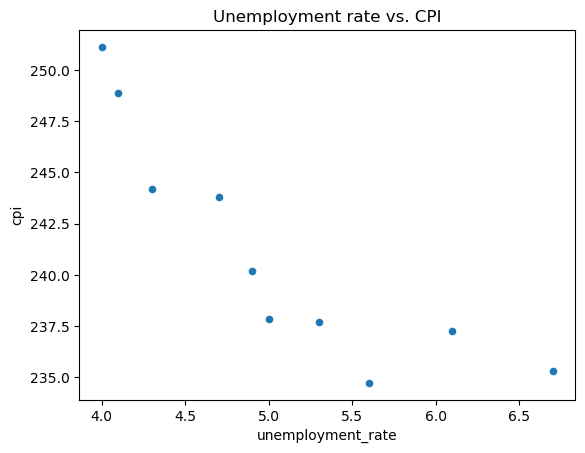

In [161]:
import matplotlib.pyplot as plt
inflation_unemploy.plot(
    x='unemployment_rate',
    y='cpi',
    kind='scatter'
)

plt.title('Unemployment rate vs. CPI')

plt.show()

>You created a Phillips curve. There are critics of the curve, but what is more important in this example is that you were able to use entries where you had entries in both tables by using an inner join. You might ask why not use the default outer join and use forward fill to fill to estimate the missing variables. You might choose differently. In this case, instead of showing an estimated unemployment rate (which is a continually changing measure) for five periods, that data was dropped from the plot.

### merge_ordered() caution, multiple columns
When using merge_ordered() to merge on multiple columns, the order is important when you combine it with the forward fill feature. The function sorts the merge on columns in the order provided. In this exercise, we will merge GDP and population data from the World Bank for Australia and Sweden, reversing the order of the merge on columns. The frequency of the series are different, the GDP values are quarterly, and the population is yearly. Use the forward fill feature to fill in the missing data. Depending on the order provided, the fill forward will use unintended data to fill in the missing values.

In [164]:
pop = pd.read_csv('datasets_join/pop.csv')
gdp2 = pd.read_csv('datasets_join/gdp.csv')
pop.head()

,date,country,pop,series_code
0,1990-01-01,Australia,17065100,SP.POP.TOTL
1,1991-01-01,Australia,17284000,SP.POP.TOTL
2,1992-01-01,Australia,17495000,SP.POP.TOTL
3,1993-01-01,Australia,17667000,SP.POP.TOTL
4,1990-01-01,Sweden,8558835,SP.POP.TOTL


In [165]:
gdp2.head()

,date,country,gdp,series_code
0,1990-01-01,Australia,158051.1324,NYGDPMKTPSAKD
1,1990-04-01,Australia,158263.5816,NYGDPMKTPSAKD
2,1990-07-01,Australia,157329.2790,NYGDPMKTPSAKD
3,1990-09-01,Australia,158240.6781,NYGDPMKTPSAKD
4,1991-01-01,Australia,156195.9535,NYGDPMKTPSAKD


In [166]:
ctry_date = pd.merge_ordered(
    left=gdp2,
    right=pop,
    on=['date', 'country'],
    fill_method='ffill'
)

ctry_date

,date,country,gdp,series_code_x,pop,series_code_y
0,1990-01-01,Australia,158051.13240,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
1,1990-01-01,Sweden,79837.84599,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
2,1990-04-01,Australia,158263.58160,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
3,1990-04-01,Sweden,80582.28597,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
4,1990-07-01,Australia,157329.27900,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
5,1990-07-01,Sweden,79974.36017,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
6,1990-09-01,Australia,158240.67810,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
7,1990-09-01,Sweden,80106.49738,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
8,1991-01-01,Australia,156195.95350,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
9,1991-01-01,Sweden,79524.24192,NYGDPMKTPSAKD,8617375,SP.POP.TOTL


In [167]:
ctry_date = pd.merge_ordered(
    left=gdp2,
    right=pop,
    on=['country', 'date'],
    fill_method='ffill'
)

ctry_date

,date,country,gdp,series_code_x,pop,series_code_y
0,1990-01-01,Australia,158051.13240,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
1,1990-04-01,Australia,158263.58160,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
2,1990-07-01,Australia,157329.27900,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
3,1990-09-01,Australia,158240.67810,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
4,1991-01-01,Australia,156195.95350,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
5,1991-04-01,Australia,155989.03270,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
6,1991-07-01,Australia,156635.85760,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
7,1991-09-01,Australia,156744.05660,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
8,1992-01-01,Australia,157916.08110,NYGDPMKTPSAKD,17495000,SP.POP.TOTL
9,1992-04-01,Australia,159047.82710,NYGDPMKTPSAKD,17495000,SP.POP.TOTL


>When you merge on date first, the table is sorted by date then country. When forward fill is applied, Sweden's population value in January is used to fill in the missing values for both Australia and Sweden for the remainder of the year. This is not what you want. The fill forward is using unintended data to fill in the missing values. However, when you merge on country first, the table is sorted by country then date, so the forward fill is applied appropriately in this situation.

### Using merge_asof() to study stocks
You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, JP Morgan (JPM), Wells Fargo (WFC), and Bank Of America (BAC). You want to know how the price change of the two other banks compare to JP Morgan. Therefore, you will need to merge these three logs into one table. Afterward, you will use the `pandas` `.diff()` method to compute the price change over time. Finally, plot the price changes so you can review your analysis.

The three log files have been loaded for you as tables named `jpm`, `wells`, and `bac`.

In [170]:
jpm = pd.read_csv('datasets_join/jpm.csv')
wells = pd.read_csv('datasets_join/wells.csv')
bac = pd.read_csv('datasets_join/bac.csv')

In [171]:
jpm.sort_values(
    by='date_time'
)

,date_time,close
0,2017-11-17 15:35:17,98.1200
1,2017-11-17 15:40:04,98.1800
2,2017-11-17 15:45:01,97.7307
3,2017-11-17 15:50:55,97.7400
4,2017-11-17 15:55:00,97.8150
5,2017-11-17 16:00:30,98.0200
6,2017-11-17 16:05:07,97.8000
7,2017-11-17 16:10:08,97.8400
8,2017-11-17 16:15:11,97.7100
9,2017-11-17 16:20:29,97.7600


In [172]:
wells.sort_values(
    by='date_time'
)

,date_time,close
0,2017-11-17 15:35:08,54.3227
1,2017-11-17 15:40:00,54.3200
2,2017-11-17 15:45:32,54.1900
3,2017-11-17 15:50:07,54.1700
4,2017-11-17 15:55:00,54.1841
5,2017-11-17 16:00:30,54.2650
6,2017-11-17 16:05:52,54.2000
7,2017-11-17 16:10:22,54.1550
8,2017-11-17 16:15:43,54.1900
9,2017-11-17 16:20:07,54.2050


In [173]:
bac.head()

,date_time,close
0,2017-11-17 15:35:17,26.552
1,2017-11-17 15:40:06,26.552
2,2017-11-17 15:45:05,26.388
3,2017-11-17 15:50:34,26.378
4,2017-11-17 15:55:06,26.383


In [174]:
jpm.dtypes

date_time     object
close        float64
dtype: object

In [175]:
wells.dtypes

date_time     object
close        float64
dtype: object

In [176]:
jpm['date_time'] = pd.to_datetime(jpm['date_time'])
wells['date_time'] = pd.to_datetime(wells['date_time'])
bac['date_time'] = pd.to_datetime(bac['date_time'])

In [177]:
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(
    jpm.sort_values('date_time'),
    wells.sort_values('date_time'),
    on='date_time',
    suffixes=('', '_wells'),
    direction='nearest' 
)

jpm_wells

,date_time,close,close_wells
0,2017-11-17 15:35:17,98.1200,54.3227
1,2017-11-17 15:40:04,98.1800,54.3200
2,2017-11-17 15:45:01,97.7307,54.1900
3,2017-11-17 15:50:55,97.7400,54.1700
4,2017-11-17 15:55:00,97.8150,54.1841
5,2017-11-17 16:00:30,98.0200,54.2650
6,2017-11-17 16:05:07,97.8000,54.2000
7,2017-11-17 16:10:08,97.8400,54.1550
8,2017-11-17 16:15:11,97.7100,54.1900
9,2017-11-17 16:20:29,97.7600,54.2050


In [178]:
jpm_wells_bac = pd.merge_asof(
    jpm_wells.sort_values('date_time'),
    bac.sort_values('date_time'),
    on='date_time',
    suffixes=('_jpm', '_bac'),
    direction='nearest'
)

jpm_wells_bac

,date_time,close_jpm,close_wells,close_bac
0,2017-11-17 15:35:17,98.1200,54.3227,26.552
1,2017-11-17 15:40:04,98.1800,54.3200,26.552
2,2017-11-17 15:45:01,97.7307,54.1900,26.388
3,2017-11-17 15:50:55,97.7400,54.1700,26.378
4,2017-11-17 15:55:00,97.8150,54.1841,26.383
5,2017-11-17 16:00:30,98.0200,54.2650,26.452
6,2017-11-17 16:05:07,97.8000,54.2000,26.373
7,2017-11-17 16:10:08,97.8400,54.1550,26.388
8,2017-11-17 16:15:11,97.7100,54.1900,26.369
9,2017-11-17 16:20:29,97.7600,54.2050,26.388


In [179]:
# Compute price diff
price_diffs = jpm_wells_bac.diff()
price_diffs

,date_time,close_jpm,close_wells,close_bac
0,NaT,NaN,NaN,NaN
1,0 days 00:04:47,0.0600,-0.0027,0.000
2,0 days 00:04:57,-0.4493,-0.1300,-0.164
3,0 days 00:05:54,0.0093,-0.0200,-0.010
4,0 days 00:04:05,0.0750,0.0141,0.005
5,0 days 00:05:30,0.2050,0.0809,0.069
6,0 days 00:04:37,-0.2200,-0.0650,-0.079
7,0 days 00:05:01,0.0400,-0.0450,0.015
8,0 days 00:05:03,-0.1300,0.0350,-0.019
9,0 days 00:05:18,0.0500,0.0150,0.019


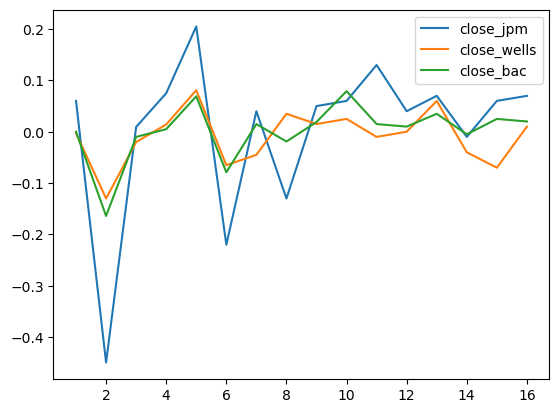

In [180]:
price_diffs.plot(
    y=['close_jpm', 'close_wells', 'close_bac']
)

plt.show()

>You can see that during this period, the price change for these bank stocks was roughly the same, although the price change for `_JP Morgan_` was more variable. The critical point here is that the `merge_asof()` function is very useful in performing the fuzzy matching between the timestamps of all the tables.

### Using merge_asof() to create dataset
The `merge_asof()` function can be used to create datasets where you have a table of start and stop dates, and you want to use them to create a flag in another table. You have been given `gdp`, which is a table of quarterly GDP values of the US during the 1980s. Additionally, the table `recession` has been given to you. It holds the starting date of every US recession since 1980, and the date when the recession was declared to be over. Use `merge_asof()` to merge the tables and create a status flag if a quarter was during a recession. Finally, to check your work, plot the data in a bar chart.

The tables `gdp` and `recession` will be loaded.

In [183]:
gdp3 = pd.read_csv('datasets_join/gdp(3).csv')
recession = pd.read_csv('datasets_join/recession.csv')
gdp3['date'] = pd.to_datetime(gdp3['date'])
recession['date'] = pd.to_datetime(recession['date'])
gdp3

,date,gdp
0,1979-01-01,2526.610
1,1979-04-01,2591.247
2,1979-07-01,2667.565
3,1979-10-01,2723.883
4,1980-01-01,2789.842
5,1980-04-01,2797.352
6,1980-07-01,2856.483
7,1980-10-01,2985.557
8,1981-01-01,3124.206
9,1981-04-01,3162.532


In [184]:
recession

,date,econ_status
0,1980-01-01,recession
1,1980-08-01,normal
2,1981-07-01,recession
3,1982-12-01,normal
4,1990-07-01,recession
5,1991-04-01,normal
6,2001-03-01,recession
7,2001-12-01,normal
8,2007-12-01,recession
9,2009-07-01,normal


In [185]:
gdp_recession = pd.merge_asof(
    gdp3.sort_values('date'),
    recession.sort_values('date'),
    on='date')

gdp_recession

,date,gdp,econ_status
0,1979-01-01,2526.610,NaN
1,1979-04-01,2591.247,NaN
2,1979-07-01,2667.565,NaN
3,1979-10-01,2723.883,NaN
4,1980-01-01,2789.842,recession
5,1980-04-01,2797.352,recession
6,1980-07-01,2856.483,recession
7,1980-10-01,2985.557,normal
8,1981-01-01,3124.206,normal
9,1981-04-01,3162.532,normal


In [186]:
# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

In [187]:
is_recession = []
for s in  gdp_recession['econ_status']:
    if s == 'recession':
        is_recession.append('r')
else:
    is_recession.append('g')

In [188]:
is_recession

['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'g']

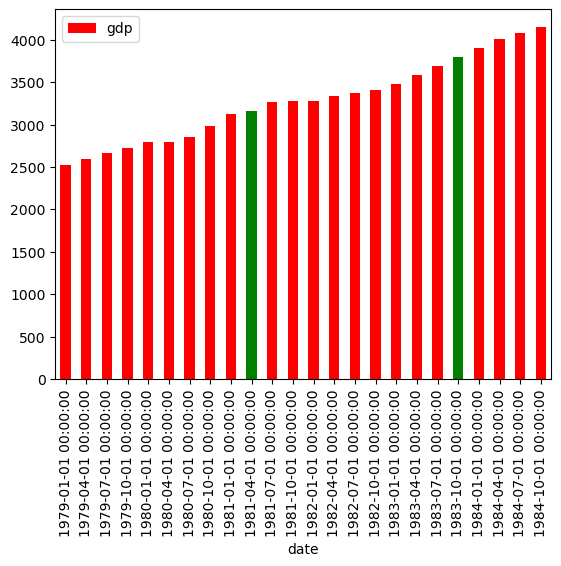

In [189]:
gdp_recession.plot(
    kind='bar',
    y='gdp',
    x='date',
    color=is_recession,
    rot=90
)

plt.show()

>You can see from the chart that there were a number of quarters early in the 1980s where a recession was an issue. merge_asof() allowed you to quickly add a flag to the gdp dataset by matching between two different dates, in one line of code! If you were to perform the same task using subsetting, it would have taken a lot more code.

### Subsetting rows with .query()
In this exercise, you will revisit GDP and population data for Australia and Sweden from the World Bank and expand on it using the `.query()` method. You'll merge the two tables and compute the GDP per capita. Afterwards, you'll use the `.query()` method to sub-select the rows and create a plot. Recall that you will need to merge on multiple columns in the proper order.

In [336]:
pop.head()

,date,country,pop,series_code
0,1990-01-01,Australia,17065100,SP.POP.TOTL
1,1991-01-01,Australia,17284000,SP.POP.TOTL
2,1992-01-01,Australia,17495000,SP.POP.TOTL
3,1993-01-01,Australia,17667000,SP.POP.TOTL
4,1990-01-01,Sweden,8558835,SP.POP.TOTL


In [340]:
gdp2.head()

,date,country,gdp,series_code
0,1990-01-01,Australia,158051.1324,NYGDPMKTPSAKD
1,1990-04-01,Australia,158263.5816,NYGDPMKTPSAKD
2,1990-07-01,Australia,157329.2790,NYGDPMKTPSAKD
3,1990-09-01,Australia,158240.6781,NYGDPMKTPSAKD
4,1991-01-01,Australia,156195.9535,NYGDPMKTPSAKD


In [ ]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, 
                           on=['country','date'], 
                           fill_method='ffill')

print(gdp_pop)                           

In [346]:
gdp_pop = pd.merge_ordered(
    gdp2,
    pop,
    on=['country', 'date'],
    fill_method='ffill'
)

gdp_pop.head()

,date,country,gdp,series_code_x,pop,series_code_y
0,1990-01-01,Australia,158051.1324,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
1,1990-04-01,Australia,158263.5816,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
2,1990-07-01,Australia,157329.2790,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
3,1990-09-01,Australia,158240.6781,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
4,1991-01-01,Australia,156195.9535,NYGDPMKTPSAKD,17284000,SP.POP.TOTL


In [350]:
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']
gdp_pop.head()

,date,country,gdp,series_code_x,pop,series_code_y,gdp_per_capita
0,1990-01-01,Australia,158051.1324,NYGDPMKTPSAKD,17065100,SP.POP.TOTL,0.009262
1,1990-04-01,Australia,158263.5816,NYGDPMKTPSAKD,17065100,SP.POP.TOTL,0.009274
2,1990-07-01,Australia,157329.2790,NYGDPMKTPSAKD,17065100,SP.POP.TOTL,0.009219
3,1990-09-01,Australia,158240.6781,NYGDPMKTPSAKD,17065100,SP.POP.TOTL,0.009273
4,1991-01-01,Australia,156195.9535,NYGDPMKTPSAKD,17284000,SP.POP.TOTL,0.009037


In [354]:
gdp_pivot = gdp_pop.pivot_table(
    values='gdp_per_capita',
    index='date',
    columns='country'
)

gdp_pivot

country,Australia,Sweden
date,,
1990-01-01,0.009262,0.009328
1990-04-01,0.009274,0.009415
1990-07-01,0.009219,0.009344
1990-09-01,0.009273,0.009360
1991-01-01,0.009037,0.009228
1991-04-01,0.009025,0.009176
1991-07-01,0.009062,0.009177
1991-09-01,0.009069,0.009253
1992-01-01,0.009026,0.009159


In [358]:
recent_gdp_pop = gdp_pivot.query('date >= "1991-01-01"')
recent_gdp_pop

country,Australia,Sweden
date,,
1991-01-01,0.009037,0.009228
1991-04-01,0.009025,0.009176
1991-07-01,0.009062,0.009177
1991-09-01,0.009069,0.009253
1992-01-01,0.009026,0.009159
1992-04-01,0.009091,0.009121
1992-07-01,0.009183,0.009103
1992-09-01,0.009372,0.008883
1993-01-01,0.009345,0.008692


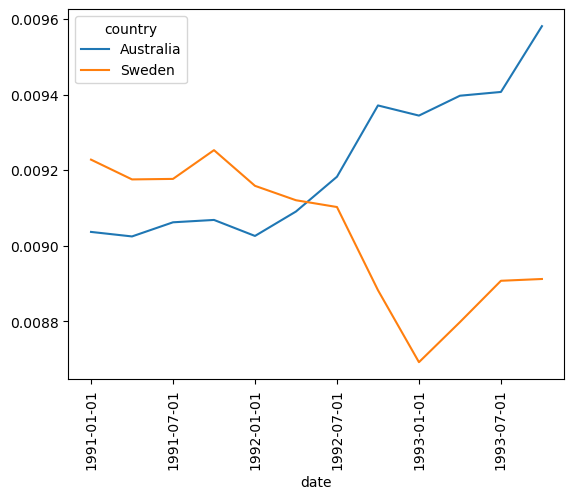

In [360]:
recent_gdp_pop.plot(rot=90)
plt.show()

> You can see from the plot that the per capita GDP of Australia passed Sweden in 1992. By using the .query() method, you were able to select the appropriate rows easily. The .query() method is easy to read and straightforward.

### Using .melt() to reshape government data
The US Bureau of Labor Statistics (BLS) often provides data series in an easy-to-read format - it has a separate column for each month, and each year is a different row. Unfortunately, this wide format makes it difficult to plot this information over time. In this exercise, you will reshape a table of US unemployment rate data from the BLS into a form you can plot using `.melt().` You will need to add a date column to the table and sort by it to plot the data correctly.

The unemployment rate data has been loaded for you in a table called `ur_wide`. You are encouraged to explore this table before beginning the exercise.

In [365]:
ur_wide = pd.read_csv('datasets_join/ur_wide.csv')
ur_wide

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2010,9.8,9.8,9.9,9.9,9.6,9.4,9.4,9.5,9.5,9.4,9.8,9.3
1,2011,9.1,9.0,9.0,9.1,9.0,9.1,9.0,9.0,9.0,8.8,8.6,8.5
2,2012,8.3,8.3,8.2,8.2,8.2,8.2,8.2,8.1,7.8,7.8,7.7,7.9
3,2013,8.0,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
4,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6
5,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0
6,2016,4.9,4.9,5.0,5.0,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7
7,2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.2,4.1,4.2,4.1
8,2018,4.1,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.7,3.9
9,2019,4.0,3.8,3.8,3.6,3.6,3.7,3.7,3.7,3.5,3.6,3.5,3.5


In [369]:
ur_tall = ur_wide.melt(
    id_vars='year',
    var_name='month',
    value_name='unempl_rate'
)

ur_tall.head()

,year,month,unempl_rate
0,2010,jan,9.8
1,2011,jan,9.1
2,2012,jan,8.3
3,2013,jan,8.0
4,2014,jan,6.6


In [385]:
ur_tall['date'] = pd.to_datetime(
    ur_tall['month'].str.capitalize() + '-' + ur_tall['year'].astype(str),
    format='%b-%Y'
)

ur_tall.head()

,year,month,unempl_rate,date
0,2010,jan,9.8,2010-01-01
1,2011,jan,9.1,2011-01-01
2,2012,jan,8.3,2012-01-01
3,2013,jan,8.0,2013-01-01
4,2014,jan,6.6,2014-01-01


In [387]:
ur_sorted = ur_tall.sort_values('date')

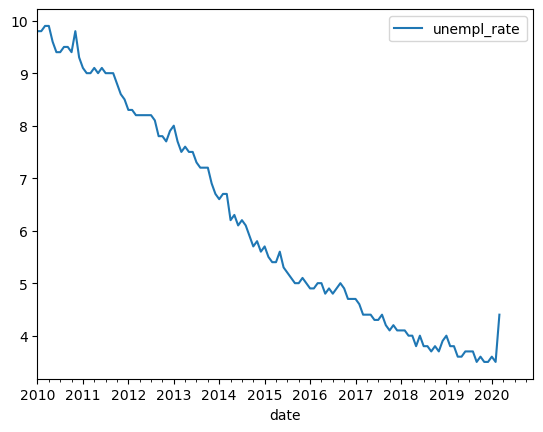

In [389]:
ur_sorted.plot(x='date', 
               y='unempl_rate')
plt.show()

>The plot shows a steady decrease in the unemployment rate with an increase near the end. This increase is likely the effect of the COVID-19 pandemic and its impact on shutting down most of the US economy. In general, data is often provided (_especially by governments_) in a format that is easily read by people but not by machines. The `.melt()` method is a handy tool for reshaping data into a useful form.

### Using `.melt()` for stocks vs bond performance

It is widespread knowledge that the price of bonds is inversely related to the price of stocks. In this last exercise, you'll review many of the topics in this chapter to confirm this. You have been given a table of percent change of the US 10-year treasury bond price. It is in a wide format where there is a separate column for each year. You will need to use the `.melt()` method to reshape this table.

Additionally, you will use the `.query()` method to filter out unneeded data. You will merge this table with a table of the percent change of the Dow Jones Industrial stock index price. Finally, you will plot data.

The tables `ten_yr` and `dji` have been loaded for you.

In [395]:
ten_yr = pd.read_csv('datasets_join/ten_yr.csv')
dji = pd.read_csv('datasets_join/dji.csv')

In [397]:
ten_yr.head()

,metric,2007-02-01,2007-03-01,2007-04-01,2007-05-01,2007-06-01,2007-07-01,2007-08-01,2007-09-01,2007-10-01,...,2009-03-01,2009-04-01,2009-05-01,2009-06-01,2009-07-01,2009-08-01,2009-09-01,2009-10-01,2009-11-01,2009-12-01
0,open,0.033491,-0.060449,0.025426,-0.004312,0.060632,0.027154,-0.059233,-0.046271,0.014400,...,0.045888,-0.102599,0.191049,0.106726,0.023966,-0.006687,-0.046564,-0.032068,0.034347,-0.050544
1,high,-0.007338,-0.040657,0.022046,0.030576,0.080268,-0.021633,-0.059796,-0.038446,0.003615,...,-0.004257,0.041105,0.186987,0.068121,-0.061784,0.031864,-0.090324,0.012447,-0.004191,0.099327
2,low,-0.016147,-0.007984,0.031075,-0.002168,0.059105,-0.027288,-0.051677,-0.043372,0.002558,...,-0.062405,0.068994,0.168185,0.123172,-0.055266,0.039510,-0.035946,-0.050733,0.030264,0.007188
3,close,-0.057190,0.021538,-0.003873,0.056156,0.029243,-0.052056,-0.049046,0.009257,-0.022712,...,-0.117067,0.163501,0.109155,0.016739,-0.006245,-0.028563,-0.027639,0.025703,-0.056309,0.200562


In [399]:
dji.head()

,date,close
0,2007-02-01,0.005094
1,2007-03-01,-0.026139
2,2007-04-01,0.048525
3,2007-05-01,0.052007
4,2007-06-01,-0.016070


In [401]:
bond_perc = ten_yr.melt(
    id_vars='metric',
    var_name='date',
    value_name='close'
)

bond_perc.head()

,metric,date,close
0,open,2007-02-01,0.033491
1,high,2007-02-01,-0.007338
2,low,2007-02-01,-0.016147
3,close,2007-02-01,-0.057190
4,open,2007-03-01,-0.060449


In [407]:
bond_perc_close = bond_perc.query("metric=='close'")
bond_perc_close.head()

,metric,date,close
3,close,2007-02-01,-0.057190
7,close,2007-03-01,0.021538
11,close,2007-04-01,-0.003873
15,close,2007-05-01,0.056156
19,close,2007-06-01,0.029243


In [411]:
dow_bond = pd.merge_ordered(
    left=dji,
    right=bond_perc_close,
    on='date',
    how='inner',
    suffixes=['_dow', '_bond']
)

dow_bond.head()

,date,close_dow,metric,close_bond
0,2007-02-01,0.005094,close,-0.057190
1,2007-03-01,-0.026139,close,0.021538
2,2007-04-01,0.048525,close,-0.003873
3,2007-05-01,0.052007,close,0.056156
4,2007-06-01,-0.016070,close,0.029243


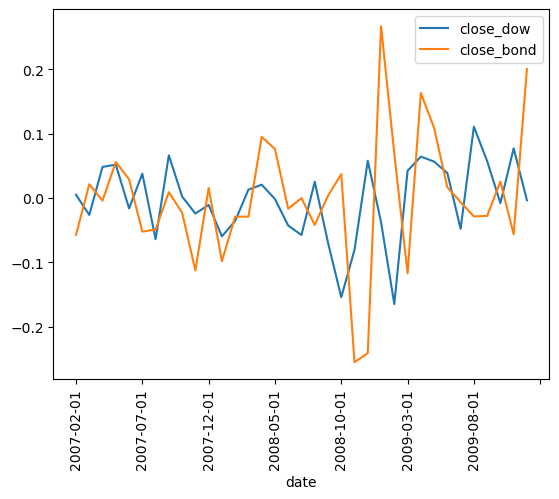

In [415]:
dow_bond.plot(
    y=['close_dow', 'close_bond'],
    x='date',
    rot=90
)

plt.show()

>We used many of the techniques we have reviewed in this chapter to produce the plot. The plot confirms that the bond and stock prices are inversely correlated. Often as the price of stocks increases, the price for bonds decreases.